## MEDICIONES DE TIEMPOS DE EJECUCIÓN DE FUNCIONES A NIVEL GRANULAR

Conforme al desarrollo del proyecto, el equipo de programación desarrolló la función **eliminacion_bloques**, la cual resuelve sistemas de ecuaciones lineales utilizando factorización $QR$. Dicha función contiene a su vez otras funciones que ayudan a la solución del problema general; de forma específica podemos enunciar las siguientes:

1. matriz_auxiliar_Arv
2. matriz_Q_R (se hace uso de la función *matri_auxiliar_Arv*)
3. crear_bloques 
4. Solucion_SEL_QR_nxn (se hace uso de la función *matriz_Q_R*)

El presente notebook tiene como objetivo realizar mediciones de los tiempos de ejecución a nivel granular, es decir, medir lAs funciones enlistadas. Adicionalmente se incluye también la medición de la matriz que permite crear matrices aleatorias: *crear_matriz_aleatoria*.

Tales mediciones se llevarán acabo para sistemas de dimensiones $2$, $10$, $100$ y $500$.

Si bien, la función **Solucion_SEL_QR_nxn** es utilizada cuatro veces en el algoritmo final (**eliminacion_bloques**), en este caso se medirá únicamente el tiempo que tarda en resolver el sistema de ecuaciones correspondiente al primer bloque, es decir, $A_{11}y=b_1$.

In [1]:
import funciones_factorizacion_QR as fqr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

Se define una función que permitirá almacenar los resultados en una tabla para poder mostrar éstos en un resumen final.

In [2]:
col_names = ['Dimensión','Tiempo ejecución']
table_df0 = pd.DataFrame(columns=col_names)
table_df1 = pd.DataFrame(columns=col_names)
table_df2 = pd.DataFrame(columns=col_names)
table_df3 = pd.DataFrame(columns=col_names)
table_df4 = pd.DataFrame(columns=col_names)

## MEDICIÓN DE TIEMPOS

### EJEMPLO 1 - MATRIZ 2X2



A continuación se presenta la medición de tiempos de ejecución de las funciones ya mencionadas, en el siguiente orden:

0. crear_matriz_aleatoria
1. matriz_auxiliar_Arv
2. matriz_Q_R 
3. crear_bloques 
4. Solucion_SEL_QR_nxn 

0. **crear_matriz_aleatoria**

In [3]:
# Definición de sistema de ecuaciones y medición de función crear_matriz_aleatoria

funcion = 'crear_matriz_aleatoria'

# Dimensiones de la matriz
m = 2
n = 2

# Lado izquierdo del sistema de ecuaciones
b= fqr.crear_matriz_aleatoria(m,1,1,2)

# Lado derecho del sistema de ecuaciones
# Medición tiempos de creación de matriz aleatoria de 2x2
begin = time.time()
A = fqr.crear_matriz_aleatoria(m,n,1,2)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla 
table_df0.loc[len(table_df0)]=['2x2',tiempo]

print('Tiempo ejecución de creación de matriz aleatoria:',tiempo)

Tiempo ejecución de creación de matriz aleatoria: 0.0001


1. **matriz_auxiliar_Arv**

In [4]:
# Medición de tiempos de función matriz_auxiliar_Arv

begin = time.time()
matriz_Arv = fqr.matriz_auxiliar_Arv(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df1.loc[len(table_df1)]=['2x2',tiempo]

print('Tiempo ejecución de matriz auxiliar para QR:',tiempo)

Tiempo ejecución de matriz auxiliar para QR: 0.0005


2. **matriz_QR**

In [5]:
# Medición de tiempos de descomposición QR

begin = time.time()
Q,R = fqr.matriz_Q_R(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df2.loc[len(table_df2)]=['2X2',tiempo]

print('Tiempo ejecución de Descomposición QR:',tiempo)

Tiempo ejecución de Descomposición QR: 0.0007


3. **crear_bloques** 

In [6]:
# Medición de tiempos de función crear_bloques

begin = time.time()
A11,A21,A12,A22,b1,b2=fqr.crear_bloques(A,b)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df3.loc[len(table_df3)]=['2X2',tiempo]

print('Tiempo ejecución de creación de bloques:',tiempo)

Tiempo ejecución de creación de bloques: 0.0001


4. **Solucion_SEL_QR_nxn**

In [7]:
# Medición de tiempos de primer sistema de ecuaciones que se resuelve en eliminacion por bloques
#Solucion_SEL_QR_nxn(A11,b1)

begin = time.time()
fqr.Solucion_SEL_QR_nxn(A11,b1)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df4.loc[len(table_df4)]=['2X2',tiempo]

print('Tiempo ejecución primer sistema de ecuaciones:',tiempo)

Tiempo ejecución primer sistema de ecuaciones: 0.0006


### EJEMPLO 2 - MATRIZ 10X10

De forma análoga al primer ejemplo, se medirán los tiempos de ejecución de las cinco funciones ya mencionadas para un sistema de $10x10$.

0. **crear_matriz_aleatoria**

In [8]:
# Definición de sistema de ecuaciones y medición de función crear_matriz_aleatoria

# Dimensiones de la matriz
m = 10
n = 10

# Lado izquierdo del sistema de ecuaciones
b= fqr.crear_matriz_aleatoria(m,1,1,2)

# Lado derecho del sistema de ecuaciones
# Medición tiempos de creación de matriz aleatoria de 10x10
begin = time.time()
A = fqr.crear_matriz_aleatoria(m,n,1,2)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla 
table_df0.loc[len(table_df0)]=['10x10',tiempo]

print('Tiempo ejecución de creación de matriz aleatoria:',tiempo)

Tiempo ejecución de creación de matriz aleatoria: 0.0012


1. **matriz_auxiliar_Arv**

In [9]:
# Medición de tiempos de función matriz_auxiliar_Arv

begin = time.time()
matriz_Arv = fqr.matriz_auxiliar_Arv(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df1.loc[len(table_df1)]=['10X10 ',tiempo]

print('Tiempo ejecución de matriz auxiliar para QR:',tiempo)

Tiempo ejecución de matriz auxiliar para QR: 0.0011


2. **matriz_QR**

In [10]:
# Medición de tiempos de descomposición QR

begin = time.time()
fqr.matriz_Q_R(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df2.loc[len(table_df2)]=['10X10',tiempo]

print('Tiempo ejecución de Descomposición QR:',tiempo)

Tiempo ejecución de Descomposición QR: 0.0023


3. **crear_bloques** 

In [11]:
# Medición de tiempos de función crear_bloques

begin = time.time()
A11,A21,A12,A22,b1,b2=fqr.crear_bloques(A,b)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df3.loc[len(table_df3)]=['10X10 ',tiempo]

print('Tiempo ejecución de creación de bloques:',tiempo)

Tiempo ejecución de creación de bloques: 0.0001


4. **Solucion_SEL_QR_nxn**

In [12]:
# Medición de tiempos de primer sistema de ecuaciones que se resuelve en eliminacion por bloques
#Solucion_SEL_QR_nxn(A11,b1)

begin = time.time()
fqr.Solucion_SEL_QR_nxn(A11,b1)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df4.loc[len(table_df4)]=['10X10 ',tiempo]

print('Tiempo ejecución primer sistema de ecuaciones:',tiempo)

Tiempo ejecución primer sistema de ecuaciones: 0.0019


### EJEMPLO 3 - MATRIZ 100X100

0. **crear_matriz_aleatoria**

In [13]:
# Definición de sistema de ecuaciones y medición de función crear_matriz_aleatoria

# Dimensiones de la matriz
m = 10**2
n = 10**2

# Lado izquierdo del sistema de ecuaciones
b= fqr.crear_matriz_aleatoria(m,1,1,2)

# Lado derecho del sistema de ecuaciones
# Medición tiempos de creación de matriz aleatoria de 10^2x10^2
begin = time.time()
A = fqr.crear_matriz_aleatoria(m,n,1,2)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla 
table_df0.loc[len(table_df0)]=['100x100',tiempo]

print('Tiempo ejecución de creación de matriz aleatoria:',tiempo)

Tiempo ejecución de creación de matriz aleatoria: 0.072


1. **matriz_auxiliar_Arv**

In [14]:
# Medición de tiempos de función matriz_auxiliar_Arv

begin = time.time()
matriz_Arv = fqr.matriz_auxiliar_Arv(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df1.loc[len(table_df1)]=['100X100 ',tiempo]

print('Tiempo ejecución de matriz auxiliar para QR:',tiempo)

Tiempo ejecución de matriz auxiliar para QR: 0.0064


2. **matriz_QR**

In [15]:
# Medición de tiempos de descomposición QR

begin = time.time()
fqr.matriz_Q_R(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df2.loc[len(table_df2)]=['100X100 ',tiempo]

print('Tiempo ejecución de Descomposición QR:',tiempo)

Tiempo ejecución de Descomposición QR: 0.0231


3. **crear_bloques** 

In [16]:
# Medición de tiempos de función crear_bloques

begin = time.time()
A11,A21,A12,A22,b1,b2=fqr.crear_bloques(A,b)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df3.loc[len(table_df3)]=['100X100 ',tiempo]

print('Tiempo ejecución de creación de bloques:',tiempo)

Tiempo ejecución de creación de bloques: 0.0001


4. **Solucion_SEL_QR_nxn**

In [17]:
# Medición de tiempos de primer sistema de ecuaciones que se resuelve en eliminacion por bloques
#Solucion_SEL_QR_nxn(A11,b1)

begin = time.time()
fqr.Solucion_SEL_QR_nxn(A11,b1)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df4.loc[len(table_df4)]=['100X100 ',tiempo]

print('Tiempo ejecución primer sistema de ecuaciones:',tiempo)

Tiempo ejecución primer sistema de ecuaciones: 0.0091


### EJEMPLO 4 - MATRIZ 500X500

0. **crear_matriz_aleatoria**

In [18]:
# Definición de sistema de ecuaciones y medición de función crear_matriz_aleatoria

# Dimensiones de la matriz
m = 500
n = 500

# Lado izquierdo del sistema de ecuaciones
b= fqr.crear_matriz_aleatoria(m,1,1,2)

# Lado derecho del sistema de ecuaciones
# Medición tiempos de creación de matriz aleatoria de 500x500
begin = time.time()
A = fqr.crear_matriz_aleatoria(m,n,1,2)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla 
table_df0.loc[len(table_df0)]=['500x500',tiempo]

print('Tiempo ejecución de creación de matriz aleatoria:',tiempo)

Tiempo ejecución de creación de matriz aleatoria: 0.9434


1. **matriz_auxiliar_Arv**

In [19]:
# Medición de tiempos de función matriz_auxiliar_Arv

begin = time.time()
matriz_Arv = fqr.matriz_auxiliar_Arv(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df1.loc[len(table_df1)]=['500X500 ',tiempo]

print('Tiempo ejecución de matriz auxiliar para QR:',tiempo)

Tiempo ejecución de matriz auxiliar para QR: 0.1813


2. **matriz_QR**

In [20]:
# Medición de tiempos de descomposición QR

begin = time.time()
fqr.matriz_Q_R(A)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df2.loc[len(table_df2)]=['500X500 ',tiempo]

print('Tiempo ejecución de Descomposición QR:',tiempo)

Tiempo ejecución de Descomposición QR: 2.5199


3. **crear_bloques** 

In [21]:
# Medición de tiempos de función crear_bloques

begin = time.time()
A11,A21,A12,A22,b1,b2=fqr.crear_bloques(A,b)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df3.loc[len(table_df3)]=['500X500 ',tiempo]

print('Tiempo ejecución de creación de bloques:',tiempo)

Tiempo ejecución de creación de bloques: 0.0002


4. **Solucion_SEL_QR_nxn**

In [22]:
# Medición de tiempos de primer sistema de ecuaciones que se resuelve en eliminacion por bloques
#Solucion_SEL_QR_nxn(A11,b1)

begin = time.time()
fqr.Solucion_SEL_QR_nxn(A11,b1)
end = time.time()
tiempo = round(end-begin,4)

# Almacenamiento de tiempo de ejecución en tabla
table_df4.loc[len(table_df4)]=['500X500 ',tiempo]

print('Tiempo ejecución primer sistema de ecuaciones:',tiempo)

Tiempo ejecución primer sistema de ecuaciones: 0.1933


## RESULTADOS

En seguida se muestra una comparación de los tiempos obtenidos en la ejecución de cada función, al variar las dimensiones de la matriz de entrada. Se presentan tanto la tabla con los tiempos en segundos redeondeados a cuatro decimales, como las gráficas asociadas

0. **crear_matriz_aleatoria**

In [23]:
# Tabla de tiempos función crear_matriz_aleatoria
print('\nFunción: crear_matriz_aleatoria\n')
table_df0


Función: crear_matriz_aleatoria



,Dimensión,Tiempo ejecución
0,2x2,0.0001
1,10x10,0.0012
2,100x100,0.0720
3,500x500,0.9434


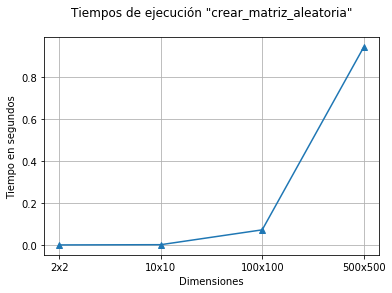

In [24]:
# Gráfica de tiempos función crear_matriz_aleatoria
dimensiones = table_df0['Dimensión']
tiempos = table_df0['Tiempo ejecución']

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución "crear_matriz_aleatoria"\n')
plt.show()

La tabla y gráfica anteriores muestran que los tiempos de creación de una matriz aleatoria aumentan, conforme aumentan las dimensiones de las matriz de entrada; y van del orden de $10^{⁻4}s$ hasta $1s$, dependiendo del tamaño de la matriz.

1. **matriz_auxiliar_Arv**

In [25]:
# Tabla de tiempos función matriz_auxiliar_Arv
print('\nFunción: matriz_auxiliar_Arv\n')
table_df1


Función: matriz_auxiliar_Arv



,Dimensión,Tiempo ejecución
0,2x2,0.0005
1,10X10,0.0011
2,100X100,0.0064
3,500X500,0.1813


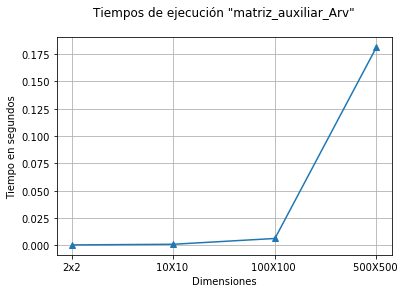

In [26]:
# Gráfica de tiempos función matriz_auxiliar_Arv
dimensiones = table_df1['Dimensión']
tiempos = table_df1['Tiempo ejecución']

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución "matriz_auxiliar_Arv"\n')
plt.show()

De igual forma que en la función anterior, el tiempo de ejecución de la función **matriz_auxiliar_Arv** se incrementa al aumentar las dimensiones de la matriz de entrada. En este caso los tiempos de ejecución son del orden de $10^{-4} s$ a $10^{-1} s$.

2. **matriz_QR**

In [27]:
# Tabla de tiempos función Factorizacion_QR
print('\nFunción: matriz_QR\n')
table_df2


Función: matriz_QR



,Dimensión,Tiempo ejecución
0,2X2,0.0007
1,10X10,0.0023
2,100X100,0.0231
3,500X500,2.5199


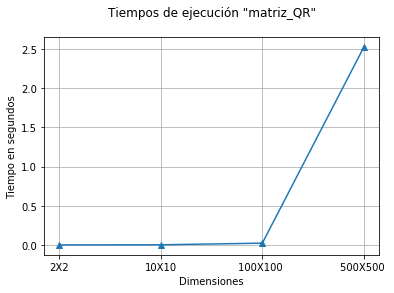

In [28]:
# Gráfica de tiempos función Factorizacion_QR
dimensiones = table_df2['Dimensión']
tiempos = table_df2['Tiempo ejecución']

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución "matriz_QR"\n')
plt.show()

A pesar de que las matrices de dimensión $100x100$ y $500x500$, son del mismo orden: $10^3$, la función **matriz_QR** tarda aproximadamente $100$ veces más en calcular la factorización QR de la segunda. Por otro lado, el tiempo de ejecución de las matrices de tamaño $2x2$ y $100x100$ es del mismo orden, a pesar de sus dimensiones varían en un orden de magnitud. Los tiempos de esta función van del orden de $10^{-4} s$ hasta aproximadamente $3s$.

3. **crear_bloques** 

In [30]:
# Tabla de tiempos función crear_bloques
print('\nFunción: crear_bloques\n')
table_df3


Función: crear_bloques



,Dimensión,Tiempo ejecución
0,2X2,0.0001
1,10X10,0.0001
2,100X100,0.0001
3,500X500,0.0002


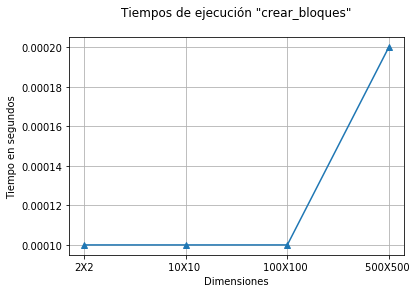

In [31]:
# Gráfica de tiempos función crear_bloques
dimensiones = table_df3['Dimensión']
tiempos = table_df3['Tiempo ejecución']

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución "crear_bloques"\n')
plt.show()

Debemos ser cuidadosos al interpretar la gráfica anterior por la escala que se está manejando, los tiempos de la función **crear_bloques** son del orden $10^{-4}s$ para las 4 matrices que fueron probadas. Por lo tanto, los datos de la tabla sugieren que este tiempo se mantiene constante independiente del tamaño de la matriz.

4. **Solucion_SEL_QR_nxn**

In [32]:
# Tabla de tiempos función Solucion_SEL_QR
print('\nFunción: Solucion_SEL_QR_nxn\n')
table_df4


Función: Solucion_SEL_QR_nxn



,Dimensión,Tiempo ejecución
0,2X2,0.0006
1,10X10,0.0019
2,100X100,0.0091
3,500X500,0.1933


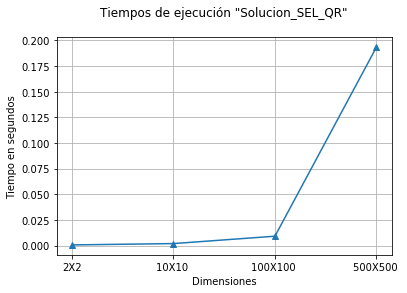

In [33]:
# Gráfica de tiempos función Solucion_SEL_QR
dimensiones = table_df4['Dimensión']
tiempos = table_df4['Tiempo ejecución']

plt.plot(dimensiones, tiempos, '^-')
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo en segundos')
plt.grid(True)
plt.title('Tiempos de ejecución "Solucion_SEL_QR"\n')
plt.show()

Finalmente, al resolver el primer sistema de ecuaciones de la división por bloques, se observa de igual forma que en las funciones anteriores, un incremento en los tiempos conforme aumenta el tamaño de la matriz de entrada. Los tiempos de ejecución varían entre $10^{-4} s$ y $10^{-1} s$.

Como resumen de los resultados mostrados en las gráficas y tablas, sobre los tiempos de ejecución de las funciones al variar el tamaño de la matriz de entrada, destacan los siguientes puntos:

+ En general, los tiempos de ejecución de las funciones aumentan conforme aumentan las dimensiones de la matriz. Excepto en la función **crear_bloques**, la cual mantiene un tiempo constante en la creación de submatrices para las 4 matrices que fueron probadas.
+ La función **matriz_QR** es la que tiene asociada los tiempos más altos de ejecución, alcanzando los $3s$ en matrices de tamaño $500x500$.
+ La función **matriz_auxiliar_Arv** y **Solucion_SEL_QR** son las que presentan menores tiempos de ejecución, variando entre $10^{-4} s$ y $10^{-1} s$.